In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

Loading the Data

In [2]:
choc_sales = pd.read_csv("/content/Chocolate Sales.csv")


In [3]:
choc_sales.head(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
choc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


8.  Are there any missing values in the dataset (e.g., in Sales Person, Country, Product, Date,
Amount, or Boxes Shipped)? How would you handle them?

  Ans: There are no missing values in the dataset. If it had, I would do
 mean or median for Numerical features and mode for Categorical features.

  Justification: Prevents data loss while maintaining structure.

In [5]:
choc_sales.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


Q-12. There are no duplicates, If found, would remove exact duplicates.

Justification: Duplicates inflate counts and bias results — clean to ensure accuracy.

In [6]:
choc_sales.duplicated().sum()

np.int64(0)

In [7]:
choc_sales.shape

(1094, 6)

In [8]:
choc_sales.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,1094,1094,1094,1094,1094,1094.000000
unique,25,6,22,168,827,NaN
top,Kelci Walkden,Australia,Eclairs,30-Jun-22,"$2,317",NaN
freq,54,205,60,16,5,NaN
mean,NaN,NaN,NaN,NaN,NaN,161.797989
std,NaN,NaN,NaN,NaN,NaN,121.544145
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,70.000000
50%,NaN,NaN,NaN,NaN,NaN,135.000000
75%,NaN,NaN,NaN,NaN,NaN,228.750000


In [9]:
col_values_all = choc_sales.select_dtypes(include=['object', 'float'])
for col in col_values_all.columns:
    print(col_values_all[col].value_counts())
    print("___________________________________________")

Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Oby Sorrel             49
Dennison Crosswaite    49
Ches Bonnell           48
Gigi Bohling           47
Karlen McCaffrey       47
Curtice Advani         46
Madelene Upcott        45
Kaine Padly            45
Marney O'Breen         45
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Barr Faughny           43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Rafaelita Blaksland    34
Wilone O'Kielt         34
Camilla Castle         32
Name: count, dtype: int64
___________________________________________
Country
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64
___________________________________________
Product
Eclairs                 60
50% Dark Bites          60
Smooth Sliky 

Q-9. There are no ranges given in the date column, if it did, I would extract the start or end date (typically the start date).

Justification: Ranges aren't usable in time-based analysis.

Q-10. There were no negative or unrealistic values for Amount column. I have changed its datatype from Object to Numerical as it is required for performing certain predicitons.

In [10]:
choc_sales['Amount'] = choc_sales['Amount'].replace('[\$,]', '', regex=True).astype(float)


In [11]:
choc_sales['Amount'] <= 0

,Amount
0,False
1,False
2,False
3,False
4,False
...,...
1089,False
1090,False
1091,False
1092,False


Q-11. I will keep it as a single category if it's 64% (Country) or 89% (Product).

Justification: Breaking down "Other" isn't practical unless more info is available; treat as a valid category.

**EDA:** Use visualizations (e.g., bar charts for sales by country, line plots for sales over
time, histograms for Amount) to explore the data.


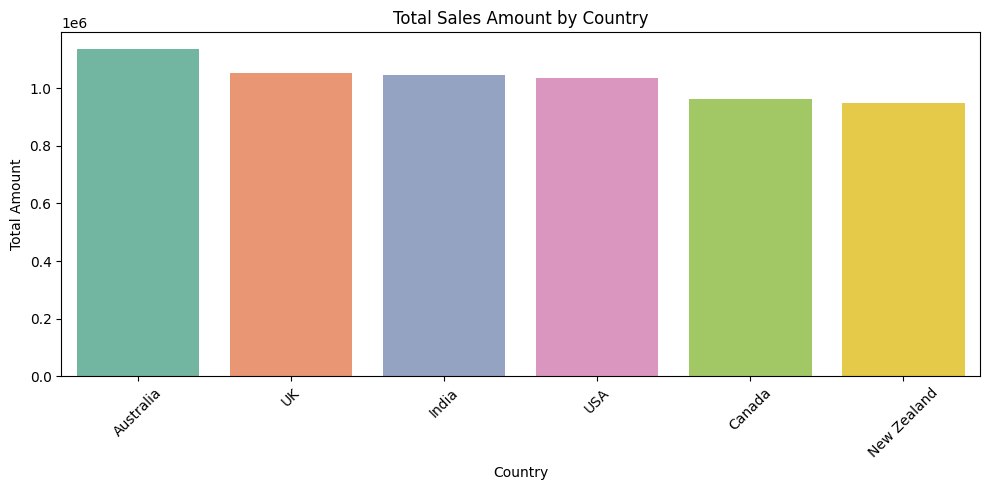

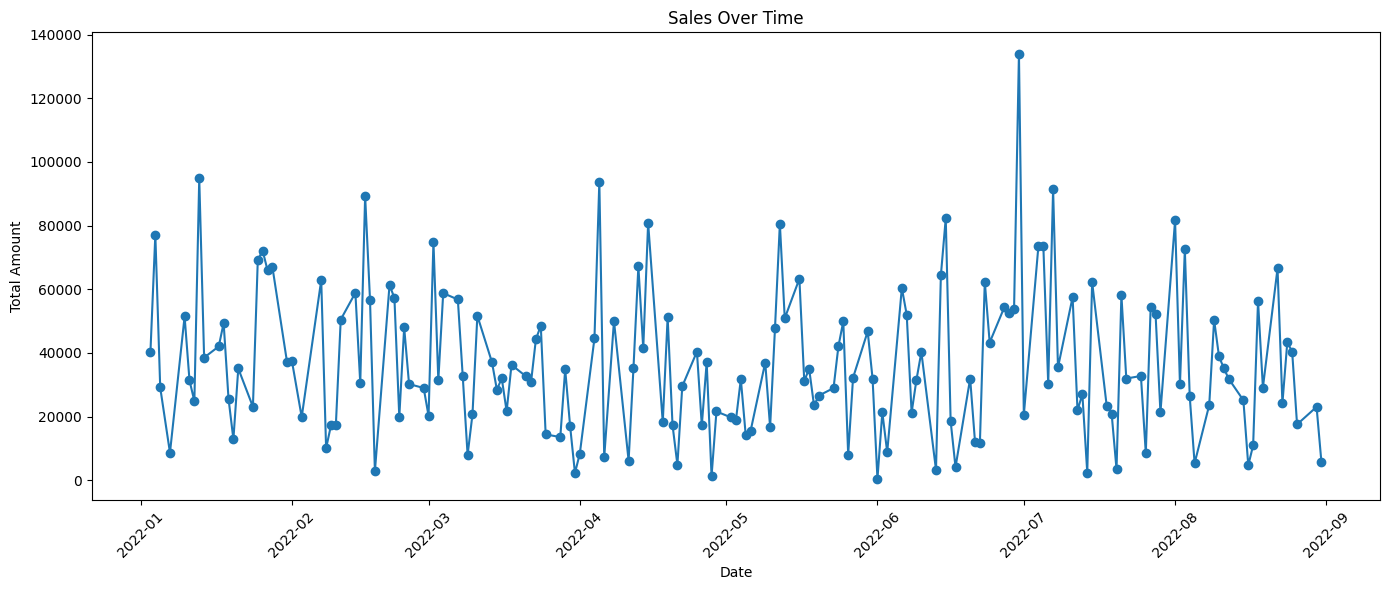

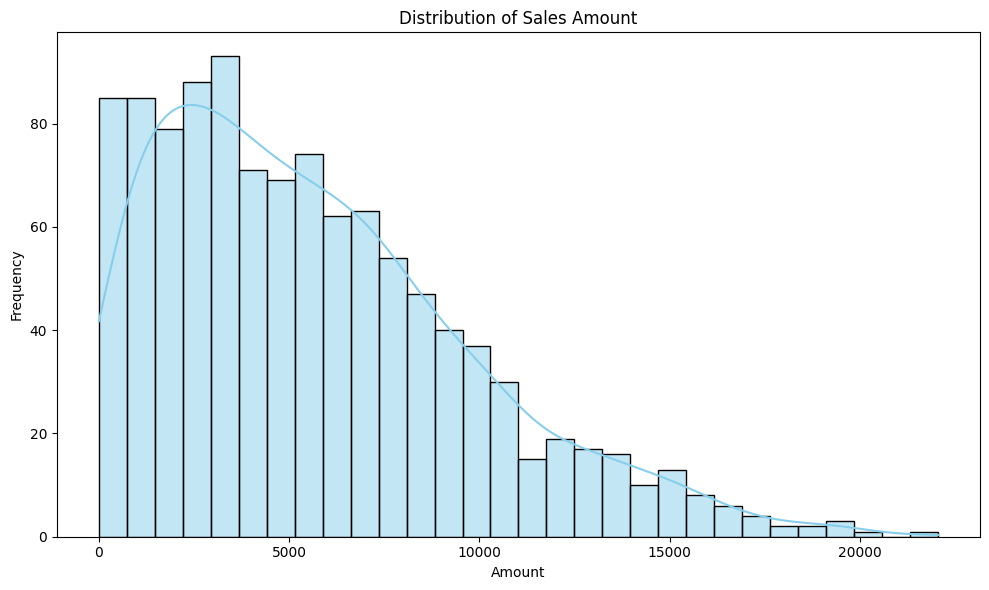

In [12]:
# Convert 'Date' column to datetime
choc_sales['Date'] = pd.to_datetime(choc_sales['Date'])

# 1. Bar Chart: Sales by Country
plt.figure(figsize=(10, 5))
country_sales = choc_sales.groupby('Country')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=country_sales.index, y=country_sales.values, palette='Set2')
plt.title('Total Sales Amount by Country')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Line Plot: Sales Over Time
plt.figure(figsize=(14, 6))
sales_over_time = choc_sales.groupby('Date')['Amount'].sum().sort_index()
plt.plot(sales_over_time.index, sales_over_time.values, marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Histogram: Distribution of Amount
plt.figure(figsize=(10, 6))
sns.histplot(choc_sales['Amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


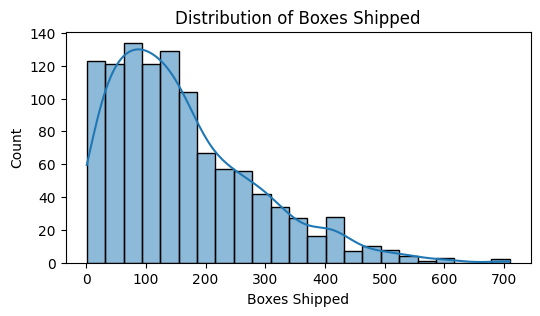

In [13]:
plt.figure(figsize=(6,3))
sns.histplot(x=choc_sales['Boxes Shipped'], kde=True)
plt.title('Distribution of Boxes Shipped')
plt.xlabel('Boxes Shipped')
plt.show()

In [16]:
outliers_boxes = choc_sales[(choc_sales['Boxes Shipped'] < lower_bound) | (choc_sales['Boxes Shipped'] > upper_bound)]
print(f"Number of outliers in Boxes Shipped: {len(outliers_boxes)}")

Number of outliers in Boxes Shipped: 0


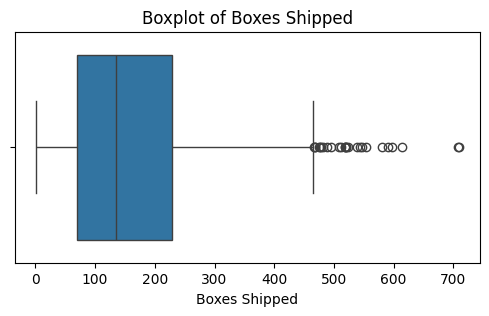

In [17]:
plt.figure(figsize=(6,3))
sns.boxplot(x=choc_sales['Boxes Shipped'])
plt.title('Boxplot of Boxes Shipped')
plt.show()

In [18]:
choc_sales[['Boxes Shipped', 'Amount']].describe()

,Boxes Shipped,Amount
count,1094.000000,1094.000000
mean,161.797989,5652.308044
std,121.544145,4102.442014
min,1.000000,7.000000
25%,70.000000,2390.500000
50%,135.000000,4868.500000
75%,228.750000,8027.250000
max,709.000000,22050.000000


In [19]:
import numpy as np

# Function to cap outliers using IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    return np.where(series < lower_bound, lower_bound,
           np.where(series > upper_bound, upper_bound, series))

# Apply capping to the columns
choc_sales['Amount_capped'] = cap_outliers(choc_sales['Amount'])
choc_sales['Boxes_Shipped_capped'] = cap_outliers(choc_sales['Boxes Shipped'])


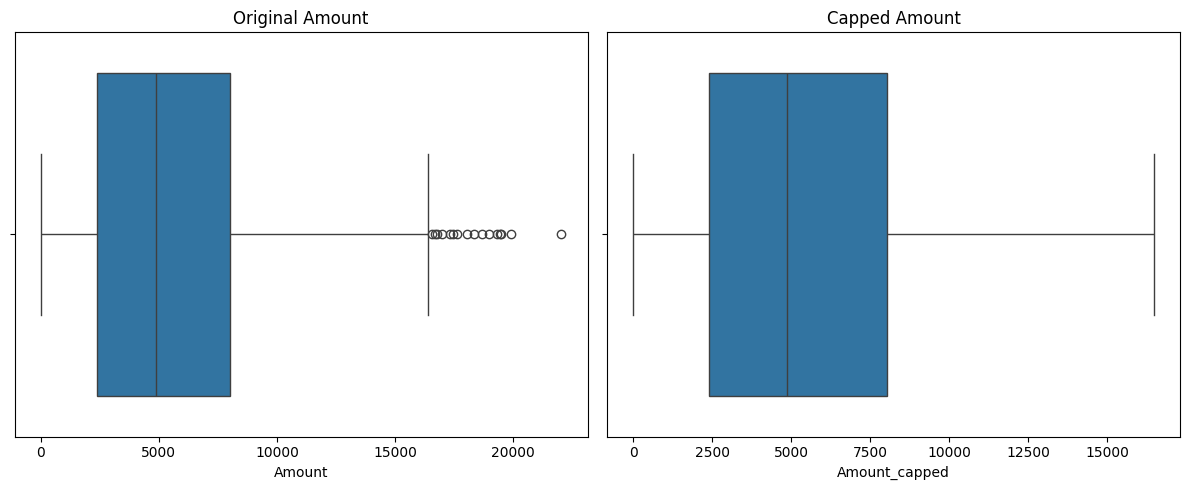

In [20]:


# Amount before and after
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=choc_sales['Amount'])
plt.title("Original Amount")

plt.subplot(1, 2, 2)
sns.boxplot(x=choc_sales['Amount_capped'])
plt.title("Capped Amount")

plt.tight_layout()
plt.show()


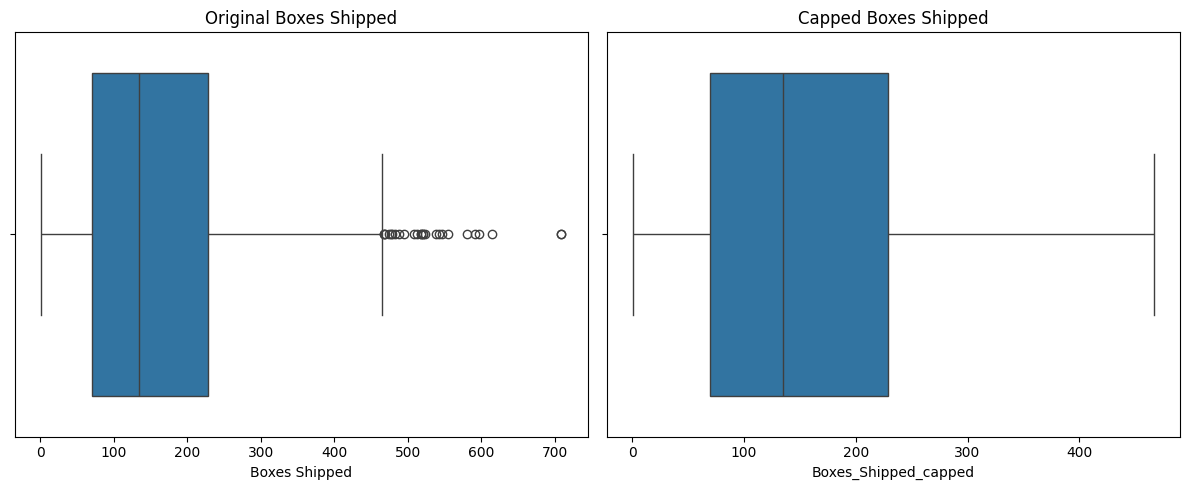

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=choc_sales['Boxes Shipped'])
plt.title("Original Boxes Shipped")

plt.subplot(1, 2, 2)
sns.boxplot(x=choc_sales['Boxes_Shipped_capped'])
plt.title("Capped Boxes Shipped")

plt.tight_layout()
plt.show()

1.  What is the total revenue generated by each salesperson (Kelci Walkden, Brien Boise,
and Others)? How do their performances compare?

  Ans: Brien Boise generated the highest total revenue followed by Kelci Walkden. I have separately found the revenues for all the sales person in the dataset, which shows some of the sales persons are performing well and others are contributing comparatively less.

In [22]:
filtered_sales = choc_sales[choc_sales['Sales Person'].isin(['Kelci Walkden', 'Brien Boise'])]

salesperson_revenue = filtered_sales.groupby('Sales Person')['Amount'].sum().reset_index()
print(salesperson_revenue)

    Sales Person    Amount
0    Brien Boise  312816.0
1  Kelci Walkden  311710.0


In [23]:
unfiltered_sales = choc_sales[~choc_sales['Sales Person'].isin(['Kelci Walkden', 'Brien Boise'])]
others_revenue = unfiltered_sales.groupby('Sales Person')['Amount'].sum().reset_index()
print(others_revenue.sort_values(by='Amount', ascending=False))
print('***********************')
print('Others revenues sum: ',others_revenue['Amount'].sum())

           Sales Person    Amount
4          Ches Bonnell  320901.0
18           Oby Sorrel  316645.0
15      Madelene Upcott  316099.0
21          Van Tuxwell  303149.0
6   Dennison Crosswaite  291669.0
2        Beverie Moffet  278922.0
13          Kaine Padly  266490.0
17       Marney O'Breen  259742.0
1          Barr Faughny  258713.0
20      Roddy Speechley  251062.0
9       Gunar Cockshoot  238483.0
8          Gigi Bohling  232666.0
14     Karlen McCaffrey  223895.0
12       Jehu Rudeforth  220976.0
11         Jan Morforth  219667.0
5        Curtice Advani  216461.0
19  Rafaelita Blaksland  210245.0
10         Husein Augar  205212.0
0        Andria Kimpton  201747.0
16       Mallorie Waber  200592.0
3        Camilla Castle  196616.0
7        Dotty Strutley  190624.0
22       Wilone O'Kielt  138523.0
***********************
Others revenues sum:  5559099.0


2.  Which country (Australia, India, or Others) contributes the most to the total sales
revenue? What percentage of the total revenue does it account for?

  Ans: Result shows Australia contributes to the highest sale, followed by UK and India. Other values are also given.

In [24]:
known_countries = choc_sales[choc_sales['Country'].isin(['Australia', 'India'])]
country_revenue = known_countries.groupby('Country')['Amount'].sum().reset_index()
print(country_revenue)



     Country     Amount
0  Australia  1137367.0
1      India  1045800.0


In [25]:
countries_others = choc_sales[~choc_sales['Country'].isin(['Australia', 'India'])]
countries_revenue = countries_others.groupby('Country')['Amount'].sum().reset_index()
print(countries_revenue.sort_values(by='Amount', ascending=False))

       Country     Amount
2           UK  1051792.0
3          USA  1035349.0
0       Canada   962899.0
1  New Zealand   950418.0


In [26]:
# Revenues and percentage of all the countries
all_countries_revenue = choc_sales.groupby('Country')['Amount'].sum().reset_index()
total_revenue = all_countries_revenue['Amount'].sum()

all_countries_revenue['Percentage'] = (all_countries_revenue['Amount'] / total_revenue) * 100
all_countries_revenue = all_countries_revenue.sort_values(by='Amount', ascending=False).reset_index(drop=True)

print(all_countries_revenue)


       Country     Amount  Percentage
0    Australia  1137367.0   18.393208
1           UK  1051792.0   17.009311
2        India  1045800.0   16.912410
3          USA  1035349.0   16.743399
4       Canada   962899.0   15.571756
5  New Zealand   950418.0   15.369917


3.  How many unique products are sold in the dataset? Which product (e.g., 50% Dark Bites,
Eclairs, or Others) has the highest number of transactions?

  Ans: 22 unique products are sold in the dataset. Eclairs and 50% Dark Bites have the highest number of transactions.

In [27]:
# Number of unique products
unique_products = choc_sales['Product'].nunique()

# Transactions per product
product_transactions = choc_sales['Product'].value_counts().reset_index()
product_transactions.columns = ['Product', 'Transaction Count']
print('Total Unique Products',unique_products)
print('****************')
print(product_transactions)


Total Unique Products 22
****************
                 Product  Transaction Count
0                Eclairs                 60
1         50% Dark Bites                 60
2     Smooth Sliky Salty                 59
3             White Choc                 58
4          Drinking Coco                 56
5    Spicy Special Slims                 54
6    Organic Choco Syrup                 52
7          85% Dark Bars                 50
8       Fruit & Nut Bars                 50
9            After Nines                 50
10   Peanut Butter Cubes                 49
11       99% Dark & Pure                 49
12             Milk Bars                 49
13       Raspberry Choco                 48
14          Almond Choco                 48
15          Orange Choco                 47
16       Mint Chip Choco                 45
17    Manuka Honey Choco                 45
18  Caramel Stuffed Bars                 43
19        70% Dark Bites                 42
20   Baker's Choco Chips          

4.  What is the trend of sales over time based on the Date column? Identify the month or
period with the highest transaction count.


5.  What is the distribution of the Amount column? Are there any outliers in the revenue
generated per transaction (e.g., values above 638.20 or below 1.00)?

  Ans: It shows skewness, means the data is not normally distributed. There are outliers in the amount column shown below.

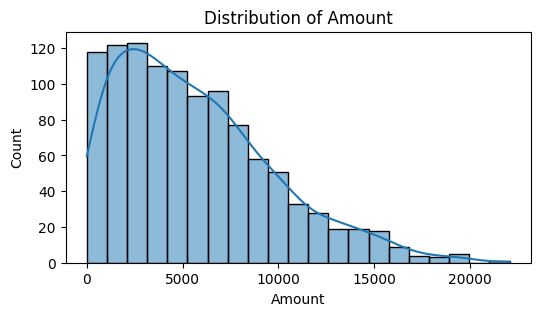

In [28]:
plt.figure(figsize=(6,3))
sns.histplot(x=choc_sales['Amount'], kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.show()

In [ ]:
# Example for Amount
Q1 = choc_sales['Amount'].quantile(0.25)
Q3 = choc_sales['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_amount = choc_sales[(choc_sales['Amount'] < lower_bound) | (choc_sales['Amount'] > upper_bound)]
print(f"Number of outliers in Amount: {len(outliers_amount)}")


Number of outliers in Amount: 16


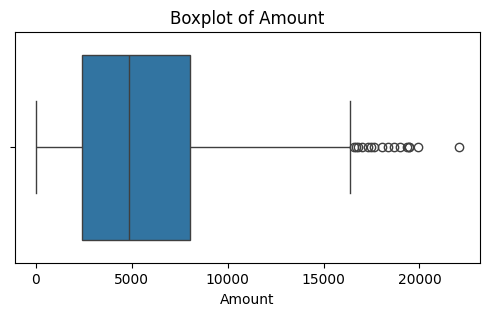

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x=choc_sales['Amount'])
plt.title('Boxplot of Amount')
plt.show()

6.  How does the number of Boxes Shipped correlate with the Amount? Is there a strong
relationship between these two variables?

  Ans: Boxes Shipped has a very weak negative correlation with Amount. No, because the heatmap shows correlation value of -0.02.

In [31]:
correlation = choc_sales['Boxes Shipped'].corr(choc_sales['Amount'])
print(f"Correlation: {correlation:.2f}")

Correlation: -0.02


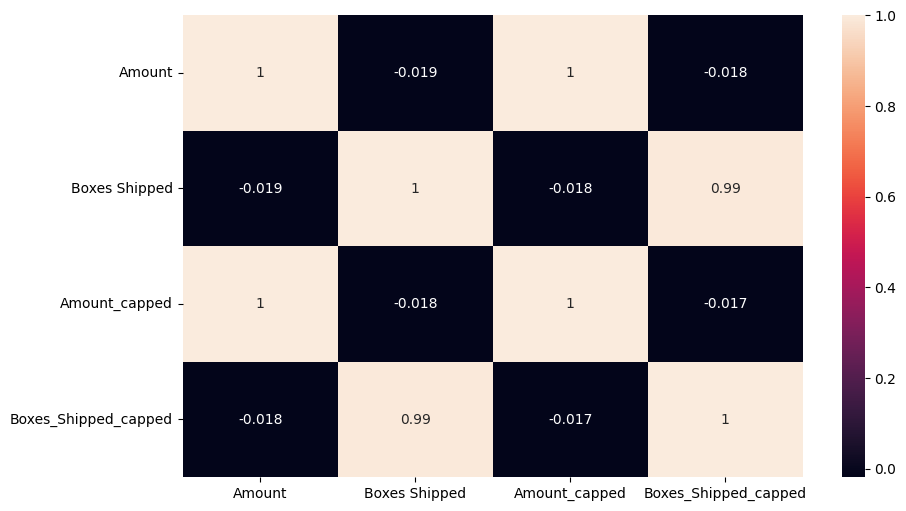

In [32]:
plt.figure(figsize=[10,6])
sns.heatmap(choc_sales.corr(numeric_only=True), annot=True)
plt.show()

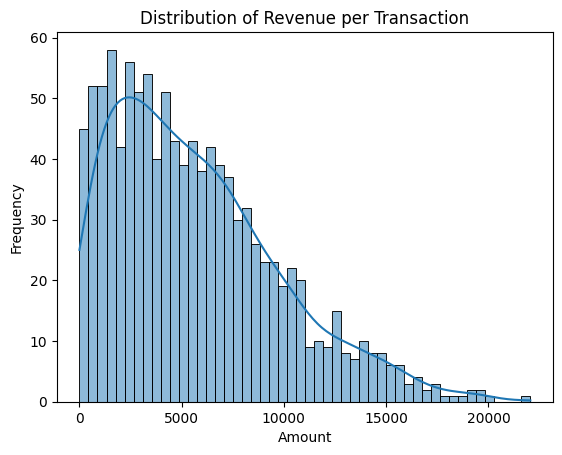

           Date      Sales Person   Amount
0     04-Jan-22    Jehu Rudeforth   5320.0
1     01-Aug-22       Van Tuxwell   7896.0
2     07-Jul-22      Gigi Bohling   4501.0
3     27-Apr-22      Jan Morforth  12726.0
4     24-Feb-22    Jehu Rudeforth  13685.0
...         ...               ...      ...
1087  24-May-22    Beverie Moffet   3066.0
1089  17-May-22  Karlen McCaffrey   4410.0
1090  07-Jun-22    Jehu Rudeforth   6559.0
1092  28-Jul-22    Dotty Strutley   2086.0
1093  23-May-22  Karlen McCaffrey   5075.0

[1023 rows x 3 columns]


In [ ]:
# Plot distribution
sns.histplot(choc_sales['Amount'], bins=50, kde=True)
plt.title("Distribution of Revenue per Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Outliers
outliers = choc_sales[(choc_sales['Amount'] > 638.20) | (choc_sales['Amount'] < 1.00)]
print(outliers[['Date', 'Sales Person', 'Amount']])


7.  Which salesperson shipped the most boxes of chocolate? Does this align with their total
revenue contribution?

  Ans: Karlen McCaffrey shipped the most boxes of chocolate overall. However, this does not align with total revenue contribution, as the correlation between Boxes Shipped and Amount is very weak (-0.02). This suggests that shipping more boxes does not necessarily lead to higher revenue — likely due to differences in product pricing or order sizes.

In [33]:
boxes_shipped = choc_sales.groupby('Sales Person')['Boxes Shipped'].sum().reset_index()
print("Top by Boxes shipped:\n",boxes_shipped.sort_values(by='Boxes Shipped', ascending=False).head(1))

Top by Boxes shipped:
         Sales Person  Boxes Shipped
15  Karlen McCaffrey           9658


13. Based on the dataset, which salesperson should the chocolate company recognize as the
top performer? Justify your answer using revenue and boxes shipped.

  Ans: Ches Bonnell of the dataset is recognized as the top performer because of the revenue generated. Boxes shipped is of less importance as far as revenue is concerned.

In [34]:
revenue_per_person = choc_sales.groupby('Sales Person')['Amount'].sum().reset_index()
top_revenue_person = revenue_per_person.sort_values(by='Amount', ascending=False).head(1)

print("Top by Revenue:\n", top_revenue_person)

Top by Revenue:
    Sales Person    Amount
5  Ches Bonnell  320901.0


In [35]:
comparison = pd.merge(boxes_shipped, revenue_per_person, on='Sales Person')

# Sort by revenue or boxes (as needed)
comparison_sorted = comparison.sort_values(by='Amount', ascending=False).reset_index(drop=True)

print(comparison_sorted)

           Sales Person  Boxes Shipped    Amount
0          Ches Bonnell           7522  320901.0
1            Oby Sorrel           8608  316645.0
2       Madelene Upcott           7279  316099.0
3           Brien Boise           8102  312816.0
4         Kelci Walkden           8702  311710.0
5           Van Tuxwell           6799  303149.0
6   Dennison Crosswaite           8767  291669.0
7        Beverie Moffet           9214  278922.0
8           Kaine Padly           7253  266490.0
9        Marney O'Breen           8043  259742.0
10         Barr Faughny           6366  258713.0
11      Roddy Speechley           6899  251062.0
12      Gunar Cockshoot           6677  238483.0
13         Gigi Bohling           6303  232666.0
14     Karlen McCaffrey           9658  223895.0
15       Jehu Rudeforth           7246  220976.0
16         Jan Morforth           7661  219667.0
17       Curtice Advani           7074  216461.0
18  Rafaelita Blaksland           4297  210245.0
19         Husein Au

14. Which country should the company focus on for expanding its chocolate sales? Support
your recommendation with data.

  Ans: The company should focus on Australia for expanding its chocolate sales, as it currently generates the highest total revenue among all countries.

  The United Kingdom and India follow in 2nd and 3rd place, showing strong market potential as well. These three countries together likely represent the most profitable customer base.

  In contrast, the USA, Canada, and New Zealand rank lower (4th to 6th), indicating either smaller markets or underperformance. Therefore, focusing on top-performing countries like Australia ensures the company builds on proven demand and revenue potential.

In [36]:
top_country = choc_sales.groupby('Country')['Amount'].sum()
print(top_country.sort_values(ascending=False))


Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64


15. What insights can you provide about the popularity of chocolate products (e.g., 50% Dark
Bites vs. Eclairs)? How can the company use this to adjust its production or marketing
strategy?

  Ans: The company should maintain balanced production across these top products to meet demand.

  Marketing efforts can focus on highlighting the unique appeal of each — for example, promoting the indulgence of Eclairs, the richness of 50% Dark Bites, and the novelty of Smooth Silky Salty.

  Since customer interest is fairly evenly distributed, the company can also consider bundle offers or cross-promotions among these top items to boost overall sales.

In [37]:
# Product transaction count
product_count = choc_sales['Product'].value_counts().reset_index()
product_count.columns = ['Product', 'Transaction Count']

# Revenue by product
product_revenue = choc_sales.groupby('Product')['Amount'].sum().reset_index()

# Comparison
product_stats = pd.merge(product_count, product_revenue, on='Product')
product_stats = product_stats.sort_values(by='Transaction Count', ascending=False)

print(product_stats.head())


              Product  Transaction Count    Amount
0             Eclairs                 60  312445.0
1      50% Dark Bites                 60  341712.0
2  Smooth Sliky Salty                 59  349692.0
3          White Choc                 58  329147.0
4       Drinking Coco                 56  256655.0


16. Are there seasonal patterns in chocolate sales (e.g., higher sales in certain months)? How
can the business use this information for inventory planning?

  Ans: Increase inventory and production in the months leading up to January and June to meet expected demand.

  Plan targeted marketing campaigns during these peak months to maximize revenue.

  Adjust staffing and logistics to handle higher order volumes during these seasons.

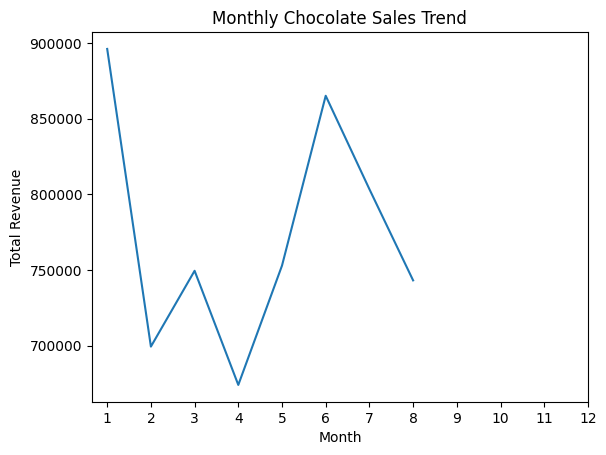

In [38]:
# Extract month
choc_sales['Date'] = pd.to_datetime(choc_sales['Date'])
choc_sales['Month'] = choc_sales['Date'].dt.month

# Group by month
monthly_sales = choc_sales.groupby('Month')['Amount'].sum().reset_index()

# Plotting trend
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x='Month', y='Amount', data=monthly_sales)
plt.title("Monthly Chocolate Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1, 13))
plt.show()


17. If the company wants to increase revenue by 20%, how many additional boxes of
chocolate would need to be shipped, assuming the current average revenue per box
remains constant?

  Ans: Additional boxes needed to increase revenue by 20%: 35401.4

In [39]:
# Current totals
current_revenue = choc_sales['Amount'].sum()
current_boxes = choc_sales['Boxes Shipped'].sum()
print(f"Current Revenue: ${current_revenue:.2f}")
print(f"Current Boxes Shipped: {current_boxes:.2f}")

# Average revenue per box
revenue_per_box = current_revenue / current_boxes
print(f'Revenue per Box: {revenue_per_box:.2f}')

# Target revenue
target_revenue = current_revenue * 1.20
print(f'Target Revenue: {target_revenue:.2f}')

# Additional revenue needed
additional_revenue_needed = target_revenue - current_revenue
print(f'Additional Revenue Needed: {additional_revenue_needed:.2f}')
# Boxes needed
additional_boxes = additional_revenue_needed / revenue_per_box
print('Additional boxes needed to increase revenue by 20%:', additional_boxes)




Current Revenue: $6183625.00
Current Boxes Shipped: 177007.00
Revenue per Box: 34.93
Target Revenue: 7420350.00
Additional Revenue Needed: 1236725.00
Additional boxes needed to increase revenue by 20%: 35401.4


18. Suppose you want to predict whether a transaction will generate "High" revenue (e.g.,
Amount > 355.00) or "Low" revenue (e.g., Amount ≤ 355.00). How would you
preprocess the dataset (e.g., encoding categorical variables like Sales Person, Country,
Product) for use in KNN, Decision Tree, Logistic Regression, and Random Forest
models?


In [40]:
choc_sales['Revenue_Label'] = choc_sales['Amount'].apply(lambda x: 'High' if x > 355 else 'Low')


In [41]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

features_cat = choc_sales[['Country', 'Product', 'Sales Person']]
encoded_features = pd.get_dummies(features_cat, drop_first=True)


In [42]:
# scaling features for KNN and LR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_features)


In [51]:
box_features_cat = choc_sales[['Country', 'Product','Boxes Shipped']]
#encoded_box_features = pd.get_dummies(box_features_cat, drop_first=True)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(box_features_cat, columns=['Country', 'Product'])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[['Boxes Shipped']] = scaler.fit_transform(df_encoded[['Boxes Shipped']])

19. Train a KNN classifier to predict whether a transaction is "High" or "Low" revenue based
on features like Boxes Shipped, Country, and Product. What value of K would you
choose, and why?

  Ans: I would choose K value to be odd (3 in this case ) and the highest as far as the accuracy result is concerned. I choose k=5 because after this value, accuracy of the model is stable. So there is no need to choose k>5.

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df_encoded, choc_sales['Revenue_Label'], test_size=0.2, random_state=42)


In [53]:
from sklearn.metrics import accuracy_score

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f'K={k}, Accuracy={accuracy_score(y_test, y_pred):.4f}')


K=1, Accuracy=0.9452
K=2, Accuracy=0.9817
K=3, Accuracy=0.9817
K=4, Accuracy=0.9817
K=5, Accuracy=0.9817
K=6, Accuracy=0.9817
K=7, Accuracy=0.9817
K=8, Accuracy=0.9817
K=9, Accuracy=0.9817
K=10, Accuracy=0.9817
K=11, Accuracy=0.9817
K=12, Accuracy=0.9817
K=13, Accuracy=0.9817
K=14, Accuracy=0.9817
K=15, Accuracy=0.9817
K=16, Accuracy=0.9817
K=17, Accuracy=0.9817
K=18, Accuracy=0.9817
K=19, Accuracy=0.9817


20. Build a Decision Tree Classifier to predict the same "High" vs. "Low" revenue outcome.
Which feature (e.g., Boxes Shipped, Country, Sales Person) is the most important in
splitting the data? How do you interpret this?

  Ans: Interpretation:

  'Boxes Shipped' has an importance of 0.52, meaning it was responsible for 52% of the decision-making in the tree.

  This tells us that the number of boxes shipped is by far the most decisive factor in determining whether revenue is High or Low.

  Categorical features like Country and Product do help, but to a much lesser extent.

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [55]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'Accuracy={accuracy_score(y_test, y_pred):.4f}')

Accuracy=0.9361


In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

importances = pd.Series(dt.feature_importances_, index=df_encoded.columns)
importances = importances.sort_values(ascending=False)
print("\nFeature Importances:")
print(importances)


              precision    recall  f1-score   support

        High       0.98      0.95      0.97       215
         Low       0.00      0.00      0.00         4

    accuracy                           0.94       219
   macro avg       0.49      0.48      0.48       219
weighted avg       0.96      0.94      0.95       219


Feature Importances:
Boxes Shipped                   0.519694
Country_USA                     0.073234
Country_New Zealand             0.063056
Country_UK                      0.055577
Product_Spicy Special Slims     0.055464
Country_India                   0.046599
Country_Australia               0.040443
Country_Canada                  0.035514
Product_Fruit & Nut Bars        0.029945
Product_Choco Coated Almonds    0.015302
Product_Milk Bars               0.012844
Product_Smooth Sliky Salty      0.009823
Product_70% Dark Bites          0.007158
Product_After Nines             0.006477
Product_Orange Choco            0.004619
Product_Drinking Coco           0.00

21. Use Logistic Regression to predict the probability of a transaction being "High" revenue.
How do the coefficients of the model help you understand the impact of Boxes Shipped
on revenue?
   
  Ans: The positive coefficient (0.462451) means that as more boxes are shipped, the likelihood of a transaction resulting in High revenue increases. While not extremely strong, this effect is significant enough to show that the quantity of boxes shipped plays an important role in driving revenue.

In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [59]:

y_pred = lr.predict(X_test)
print(f'Accuracy={accuracy_score(y_test, y_pred):.4f}')

Accuracy=0.9817


In [60]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

# View coefficients
coefficients = pd.Series(lr.coef_[0], index=df_encoded.columns)
print("\nLogistic Regression Coefficients:")
print(coefficients.sort_values(ascending=False))

              precision    recall  f1-score   support

        High       0.98      1.00      0.99       215
         Low       0.00      0.00      0.00         4

    accuracy                           0.98       219
   macro avg       0.49      0.50      0.50       219
weighted avg       0.96      0.98      0.97       219


Logistic Regression Coefficients:
Product_Spicy Special Slims     0.567404
Product_Fruit & Nut Bars        0.551368
Product_After Nines             0.500894
Product_Drinking Coco           0.477023
Boxes Shipped                   0.462451
Product_Baker's Choco Chips     0.350730
Country_New Zealand             0.310148
Product_Manuka Honey Choco      0.295984
Product_Peanut Butter Cubes     0.273642
Country_India                   0.247791
Product_Caramel Stuffed Bars    0.245437
Product_99% Dark & Pure         0.230304
Product_Orange Choco            0.198168
Country_UK                      0.092585
Country_Australia               0.006858
Product_Choco Coated Al

22. Implement a Random Forest Classifier to predict "High" vs. "Low" revenue. How does
the ensemble approach improve performance compared to a single Decision Tree? What
is the importance of each feature (e.g., Boxes Shipped, Country) in the Random Forest
model?

  Ans: A Random Forest combines predictions from many decision trees, which helps reduce overfitting and improves generalization compared to a single tree.

  The feature importance score of 0.642878 means that Boxes Shipped accounts for about 64% of the decision-making across all trees in the Random Forest.This indicates it is by far the most influential feature in predicting whether a transaction results in high or low revenue.

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'Accuracy={accuracy_score(y_test, y_pred):.4f}')

Accuracy=0.9635


In [63]:
print(classification_report(y_test, y_pred))

# Feature Importances
importances = pd.Series(rf.feature_importances_, index=df_encoded.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(importances)

              precision    recall  f1-score   support

        High       0.98      0.98      0.98       215
         Low       0.00      0.00      0.00         4

    accuracy                           0.96       219
   macro avg       0.49      0.49      0.49       219
weighted avg       0.96      0.96      0.96       219


Feature Importances:
Boxes Shipped                   0.642878
Country_India                   0.035251
Country_USA                     0.033623
Country_Australia               0.028494
Country_UK                      0.026544
Country_New Zealand             0.026127
Product_Fruit & Nut Bars        0.015996
Product_Drinking Coco           0.015439
Country_Canada                  0.015115
Product_Spicy Special Slims     0.014906
Product_After Nines             0.013940
Product_Peanut Butter Cubes     0.013536
Product_Orange Choco            0.011726
Product_Milk Bars               0.011062
Product_Manuka Honey Choco      0.009897
Product_70% Dark Bites          0.00

23. Compare the performance of KNN, Decision Tree, Logistic Regression, and Random
Forest models using accuracy, precision, and recall. Which model performs best for this
classification task, and why?

  Ans: KNN and Logistic Regression are the top performers, with identical metrics across accuracy, precision, and recall.If interpretability and training speed matter, Logistic Regression is often preferred; but if raw prediction performance is the goal, either model works equally well here.


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_test, y_pred, pos_label='High'):.4f}")
    print(f"  Recall: {recall_score(y_test, y_pred, pos_label='High'):.4f}")


KNN:
  Accuracy: 0.9817
  Precision: 0.9817
  Recall: 1.0000
Decision Tree:
  Accuracy: 0.9361
  Precision: 0.9809
  Recall: 0.9535
Logistic Regression:
  Accuracy: 0.9817
  Precision: 0.9817
  Recall: 1.0000
Random Forest:
  Accuracy: 0.9635
  Precision: 0.9814
  Recall: 0.9814


24. Tune the Random Forest model by adjusting hyperparameters (e.g., number of trees,
maximum depth). How do these changes affect the model’s performance?

  Ans: The tuned Random Forest model performs exceptionally well, especially for identifying "High" revenue transactions.
With perfect recall and very high precision, it's both reliable and comprehensive in detecting high-revenue outcomes.

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [67]:
# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9817351598173516

Classification Report:
              precision    recall  f1-score   support

        High       0.98      1.00      0.99       215
         Low       0.00      0.00      0.00         4

    accuracy                           0.98       219
   macro avg       0.49      0.50      0.50       219
weighted avg       0.96      0.98      0.97       219



25. Can you use the dataset to cluster sales transactions into groups (e.g., using K-Means)
instead of classification? What features would you use, and how might the clusters help
the business?

  Ans: Cluster 2 may represent a high-volume or frequent buyer segment, and understanding what makes this group unique (e.g., preferred products, average shipment sizes) can help the business target promotions, stock accordingly, or optimize pricing.

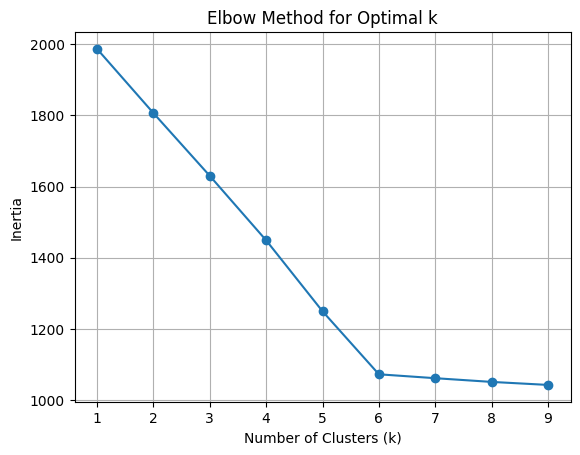

     Country              Product  Boxes Shipped  Cluster
0         UK      Mint Chip Choco            180        2
1      India        85% Dark Bars             94        2
2      India  Peanut Butter Cubes             91        2
3  Australia  Peanut Butter Cubes            342        2
4         UK  Peanut Butter Cubes            184        2


In [69]:
from sklearn.cluster import KMeans
# Elbow method to find optimal k
inertia = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_encoded)
    inertia.append(km.inertia_)

# Plot elbow curve
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Let's say you choose k=3 after elbow plot
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded)

# Optional: attach cluster labels back to original data
choc_sales_clustered = choc_sales.copy()
choc_sales_clustered['Cluster'] = df_encoded['Cluster']

# Preview
print(choc_sales_clustered[['Country', 'Product', 'Boxes Shipped', 'Cluster']].head())

 **Business Insights: Overall Findings & Actionable Recommendations**
1. "Boxes Shipped" is a key revenue driver
From Logistic Regression and Random Forest, although it showed less correlation with the revenue at first but we saw that Boxes Shipped had the strongest influence on whether a transaction results in "High" revenue.

 **Action:** The company needs to focus on increasing shipment size through bulk offers, tiered pricing, or free shipping thresholds.

2. KNN and Logistic Regression and tuned Random Forest gave near-perfect performance
These models achieved ~98% accuracy and 100% recall for "High" revenue.

  **Action:** The company may use these models in a real-time dashboard to predict high-value orders and prioritize them for faster processing, or upselling.


3. Decision Tree is interpretable, but less accurate
While easy to explain, it was slightly less accurate than the ensemble models.

 **Action:** We can avoid using DT or use it for explainability in internal reporting or for training non-technical staff to understand how decisions are made.

5. K-Means clustering can be used by
clustering grouped transactions into high-volume, region-specific, or product-focused clusters.

  **Action:** The company can use these clusters to customize marketing, adjust stock levels, and identify loyal vs. casual buyers.